### Importing dependencies

In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
import csv
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.optimize import curve_fit
import scipy
from scipy.stats import linregress

### Reading the data

In [2]:
# Study data files
world_suicide_data_path_mg = "Suicide_Data_mg/master_mg.csv"
continent_path_mg = "Suicide_Data_mg/continents_mg.csv"

# Added another file for latitude
latitude_path_mg="Suicide_Data_mg/latitude.csv"

# Read the data and the study results
world_suicide_data_mg = pd.read_csv(world_suicide_data_path_mg)
continent_data_mg=pd.read_csv(continent_path_mg)
latitude_data=pd.read_csv(latitude_path_mg)

   ### Studying the raw data files

In [3]:
continent_data_mg.head()

,country,continent
0,Algeria,Africa
1,Angola,Africa
2,Aruba,South America
3,Benin,Africa
4,United States,North America


In [4]:
world_suicide_data_mg.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [5]:
# Fixed Republic of Korea in the continents and the titles then merge the two dataframes
world_suicide_df_mg2=world_suicide_data_mg.merge(continent_data_mg, on="country", how="left" )
world_suicide_df_mg2.columns


Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       'gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation', 'continent'],
      dtype='object')

In [6]:
# Bring continent column rigth after the index next to the country column
world_suicide_df_mg2=world_suicide_df_mg2[[ 'continent','country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       'gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation']]
world_suicide_df_mg2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27820 entries, 0 to 27819
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   continent           27820 non-null  object 
 1   country             27820 non-null  object 
 2   year                27820 non-null  int64  
 3   sex                 27820 non-null  object 
 4   age                 27820 non-null  object 
 5   suicides_no         27820 non-null  int64  
 6   population          27820 non-null  int64  
 7   suicides/100k pop   27820 non-null  float64
 8   country-year        27820 non-null  object 
 9   HDI for year        8364 non-null   float64
 10  gdp_for_year ($)    27820 non-null  object 
 11  gdp_per_capita ($)  27820 non-null  int64  
 12  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(7)
memory usage: 3.0+ MB


In [7]:
# Counting the number of data per to decide which years to filter
dseries_mg=world_suicide_df_mg2["year"].value_counts()
dseries_mg


2009    1068
2001    1056
2010    1056
2007    1032
2011    1032
2002    1032
2003    1032
2000    1032
2006    1020
2008    1020
2005    1008
2004    1008
1999     996
2012     972
2013     960
1998     948
2014     936
1995     936
1996     924
1997     924
1994     816
1992     780
1993     780
1990     768
1991     768
2015     744
1987     648
1989     624
1988     588
1986     576
1985     576
2016     160
Name: year, dtype: int64

In [8]:
# QA/QC for the number of countries vs. data counts
ds=world_suicide_df_mg2["country"].value_counts()
print(ds)

Austria                   382
Mauritius                 382
Iceland                   382
Netherlands               382
Colombia                  372
                         ... 
Bosnia and Herzegovina     24
Cabo Verde                 12
Dominica                   12
Macau                      12
Mongolia                   10
Name: country, Length: 101, dtype: int64


In [9]:
# Main DataFrame Pre-Filtered merged with continents
world_suicide_df_mg2.head()

,continent,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Europe,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Europe,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Europe,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Europe,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Europe,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [10]:
#Write filtered data to new CSV
# Output File (CSV)

world_suicide_df_mg2.to_csv('Output_Data_mg/merged.csv', index=False)

In [11]:
# #Filtering the data from 2000 to 2014
world_suicide_df_2 = world_suicide_df_mg2.loc[(world_suicide_df_mg2["year"]>1999) & (world_suicide_df_mg2["year"]<=2014) ]


In [12]:
# Dropping the countries which do not have consistent data between 2000 to 2014 and writing it to csv in case needed
# Later on I will merge new_df2 with the main dataframe two further filter the entire dataframe

new_df=world_suicide_df_2.groupby(["country"]).size()
new_df2=new_df.reset_index(name='count')
new_df2=new_df2.loc[new_df2["count"]==180]
new_df2.info()
new_df2.to_csv('Output_Data_mg/new2.csv', index=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 2 to 94
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  58 non-null     object
 1   count    58 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [13]:
# New merge to create a brand new DataFrame for the new filtered DataFrame from 2000 to 2014
data_2000_2014=world_suicide_df_2.merge(new_df2, how="inner", on="country")
data_2000_2014.to_csv('Output_Data_mg/2000_2014.csv', index=False)
data_2000_2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10440 entries, 0 to 10439
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   continent           10440 non-null  object 
 1   country             10440 non-null  object 
 2   year                10440 non-null  int64  
 3   sex                 10440 non-null  object 
 4   age                 10440 non-null  object 
 5   suicides_no         10440 non-null  int64  
 6   population          10440 non-null  int64  
 7   suicides/100k pop   10440 non-null  float64
 8   country-year        10440 non-null  object 
 9   HDI for year        4584 non-null   float64
 10  gdp_for_year ($)    10440 non-null  object 
 11  gdp_per_capita ($)  10440 non-null  int64  
 12  generation          10440 non-null  object 
 13  count               10440 non-null  int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 1.2+ MB


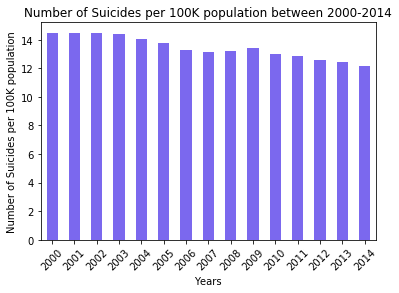

In [14]:
# Question 1 - Global Rate of Suicide increasing or Decreasing
global_15yrs=data_2000_2014.groupby("year").sum()
df_bar=global_15yrs.reset_index()
df_bar["suicide_rate"]=(df_bar["suicides_no"]/df_bar["population"])*100000
df_bar.plot(kind="bar",x="year", y="suicide_rate",rot=45, color="mediumslateblue",legend=False)
plt.ylabel("Number of Suicides per 100K population")
plt.xlabel("Years")
plt.title("Number of Suicides per 100K population between 2000-2014")
plt.savefig('Output_Data_mg/Globalrate_year00_14.png')
plt.show()

In [15]:
# Top 5 countries for suicide rate of 2009
#merged2009_with_lat_df1.nlargest(10, 'suicide_normalized')

# # Top 5 countries for suicide rate of 2009
# merged2009_with_lat_df1.nlargest(10, 'suicide_normalized')

In [16]:
# Correlation Matrix
df_bar2=df_bar.drop(columns=['suicides/100k pop', 'HDI for year','count'])
df_bar2["GDP per Capita"]=df_bar2["gdp_per_capita ($)"]/12
# corr = df_bar2.corr()
# corr.style.background_gradient(cmap='coolwarm')
# plt.savefig('Output_Data_mg/CorrelationMatrix.png')
# plt.show()
df_bar2=df_bar2.drop(columns=["gdp_per_capita ($)"])
corr = df_bar2.corr()
corr.style.background_gradient(cmap='coolwarm')
# plt.savefig('Output_Data_mg/CorrelationMatrix.png')
# plt.show()

,year,suicides_no,population,suicide_rate,GDP per Capita
year,1.000000,-0.883298,0.999616,-0.973634,0.953391
suicides_no,-0.883298,1.000000,-0.882255,0.965288,-0.882816
population,0.999616,-0.882255,1.000000,-0.973962,0.957481
suicide_rate,-0.973634,0.965288,-0.973962,1.000000,-0.956519
GDP per Capita,0.953391,-0.882816,0.957481,-0.956519,1.000000


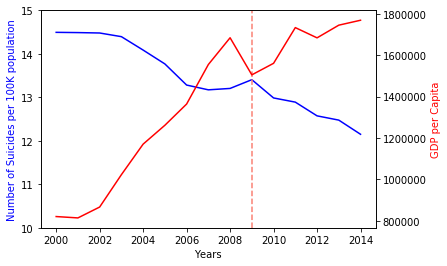

In [17]:
ax = df_bar2.plot(x="year", y="suicide_rate",legend=False, color="blue", ylim=(10,15))
ax2 = ax.twinx()
df_bar2.plot(x="year", y="GDP per Capita", ax=ax2,color="r",legend=False) 
#ax.figure.legend(labels=("GDP per Capita","SUI"), loc="best")
# plt.ylabel("Number of Suicides per 100K population")
# plt.xlabel("Years")
ax.set_xlabel('Years')
ax.set_ylabel('Number of Suicides per 100K population', color="blue")
ax2.set_ylabel('GDP per Capita', color='r')
#plt.title("Number of Suicides per 100K and GDP per Capita between 2000-2014")
#ax.legend(labels=("GDP per Capita"), loc="best")
x_n1=[2009,2009]
y_n1=[10,15]
#ylim=(12,14.5)
ax.plot(x_n1, y_n1,linestyle="--",color="salmon")
plt.savefig('Output_Data_mg/Globalrate_andGDP_year00_14.png')
plt.show()

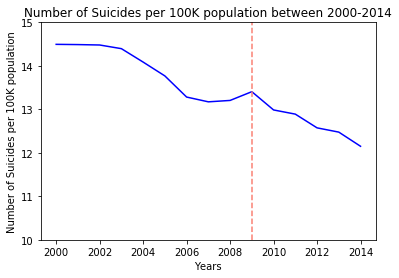

In [18]:
# Question 1-As line plot
df_bar.plot(kind="line",x="year", y="suicide_rate", color="BLUE",ylim=(10,15),legend=False)
plt.ylabel("Number of Suicides per 100K population")
plt.xlabel("Years")
plt.title("Number of Suicides per 100K population between 2000-2014")
x_n1=[2009,2009]
y_n1=[10,15]
ylim=(12,14.5)
plt.plot(x_n1, y_n1,linestyle="--",color="salmon")
plt.savefig('Output_Data_mg/Line_with2009_markerGlobalrate_year00_14.png')
plt.show()

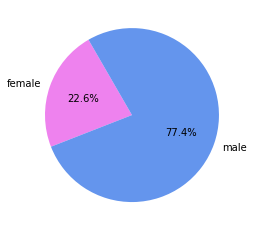

In [19]:
# Question 1a) - Global Rate of Suicide per sex
gender_15yrs=data_2000_2014.groupby("sex").sum()
gender_15yrs2=gender_15yrs[["suicides_no"]]
gender_15yrs2=gender_15yrs2.rename(columns={"suicides_no": " "})
gender_15yrs2=gender_15yrs2.plot(legend=False,kind="pie",subplots=True,autopct="%1.1f%%",startangle=120,colors = ['violet', 'cornflowerblue'])

plt.savefig('Output_Data_mg/Male_Female00_14.png')
plt.show()

#Question 1b) - Global Rate of Suicide per AgeGroup


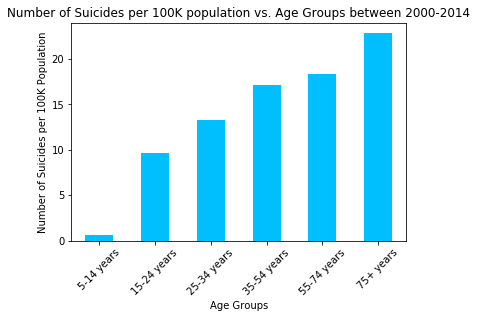

In [20]:
age_15yrs=data_2000_2014.groupby("age").sum()
df_age=age_15yrs.reset_index()

df_age2 = df_age.assign(list1=[2,3,4,1,5,6]) 
df_age2["normalized"]=df_age2["suicides_no"]/(df_age2["population"]/100000)
df_age3=df_age2.sort_values(by=["list1"])

df_age3.plot(kind="bar",x="age", y="normalized",rot=45, color="deepskyblue", legend=False)
plt.ylabel("Number of Suicides per 100K Population")
plt.xlabel("Age Groups")
plt.title("Number of Suicides per 100K population vs. Age Groups between 2000-2014")
plt.savefig('Output_Data_mg/AgeGroup_year00_14.png')
plt.show()

In [24]:
df_age2=df_age.copy()
df_age2["normalized"]=df_age2["suicides_no"]/(df_age2["population"]/100000)
df_age_new=df_age2.groupby("age").sum()
df_total=df_age_new.reset_index()
df_total

,age,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($),count,normalized
0,15-24 years,3492180,361498,3748906427,16320.33,616.018,41114564,313200,9.642759
1,25-34 years,3492180,495148,3726097572,22169.22,616.018,41114564,313200,13.288648
2,35-54 years,3492180,1169606,6818381507,28298.28,616.018,41114564,313200,17.153719
3,5-14 years,3492180,23443,3512290510,1160.70,616.018,41114564,313200,0.667456
4,55-74 years,3492180,784957,4270042061,30443.30,616.018,41114564,313200,18.382887
5,75+ years,3492180,318475,1395234649,44938.85,616.018,41114564,313200,22.825910


Text(0.5, 0, 'Age Groups')

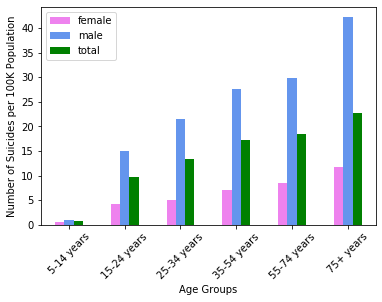

In [25]:
age_15yrs=data_2000_2014.groupby(["age","sex"]).sum()
df_age_sex=age_15yrs.reset_index()


#
df_age_sex["normalized"]=df_age_sex["suicides_no"]/(df_age_sex["population"]/100000)
# df_age4=df_age4.sort_values(by=["list1"])

# df_age4.plot(kind="bar",x="age", y="normalized",rot=45, color="deepskyblue", legend=False)
# plt.ylabel("Number of Suicides per 100K Population")
# plt.xlabel("Age Groups")
# plt.title("Number of Suicides per 100K population vs. Age Groups between 2000-2014")
# plt.savefig('Output_Data_mg/Age_Gender_Group_year00_14.png')
# plt.show()
df_age_sex_male=df_age_sex.loc[(df_age_sex["sex"]=='male')] 

df_age_sex_female=df_age_sex.loc[(df_age_sex["sex"]=='female')] 

male_gr = list(df_age_sex_male["normalized"])
female_gr = list(df_age_sex_female["normalized"])
total_gr= list(df_total["normalized"])
ind = list(df_age_sex_female["age"])
df_final = pd.DataFrame({
                   'female': female_gr,'male': male_gr, 'total':total_gr}, index=ind)

df_final_2 = df_final.assign(list1=[2,3,4,1,5,6]) 
df_final_3=df_final_2.sort_values(by=["list1"])
df_final_4=df_final_3.drop(columns=["list1"])

ax = df_final_4.plot.bar(rot=45,color=("violet", "cornflowerblue", "green"))
plt.ylabel("Number of Suicides per 100K Population")
plt.xlabel("Age Groups")

In [26]:
gender_15yrs

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($),count
sex,,,,,,,
female,10476540,712491,12022846328,29516.56,1848.054,123343692,939600
male,10476540,2440636,11448106398,113814.12,1848.054,123343692,939600


In [27]:
# New DataFrame for the most countries for year 2009, because it has the most countries.

data_2009 = world_suicide_df_mg2.loc[(world_suicide_df_mg2["year"]==2009)] 
data_2009.to_csv('Output_Data_mg/2009.csv', index=False)
data_2009.head()

,continent,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
240,Europe,Albania,2009,female,15-24 years,0,270003,0.0,Albania2009,NaN,"12,044,212,904",4387,Millenials
241,Europe,Albania,2009,female,25-34 years,0,182712,0.0,Albania2009,NaN,"12,044,212,904",4387,Generation X
242,Europe,Albania,2009,female,35-54 years,0,394286,0.0,Albania2009,NaN,"12,044,212,904",4387,Boomers
243,Europe,Albania,2009,female,5-14 years,0,236174,0.0,Albania2009,NaN,"12,044,212,904",4387,Generation Z
244,Europe,Albania,2009,female,55-74 years,0,233302,0.0,Albania2009,NaN,"12,044,212,904",4387,Silent


In [28]:
#Aggregate the total suicide_no per country for 2009 for quality check

data_2009_agg=data_2009.groupby("country").agg({"suicides_no":["sum"]})
data_2009_agg.columns = ['total_suicide_number']
data_2009_agg_by_num=data_2009_agg.reset_index()
data_2009_to_drop=data_2009_agg_by_num.loc[data_2009_agg_by_num["total_suicide_number"]==0]
data_2009_to_drop

,country,total_suicide_number
0,Albania,0
1,Antigua and Barbuda,0
33,Grenada,0


In [29]:
#Remove zero values, count number of countries =86 and continents = 6
data_2009_i=data_2009.set_index(['country'])
data_2009_clean=data_2009_i.loc[~data_2009_i.index.isin(['Albania','Antigua and Barbuda', 'Grenada'])]
data_2009_clean=data_2009_clean.reset_index()
data_2009_clean.head()

,country,continent,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Argentina,South America,2009,male,75+ years,177,653486,27.09,Argentina2009,NaN,"332,976,484,578",8961,Silent
1,Argentina,South America,2009,male,15-24 years,609,3436265,17.72,Argentina2009,NaN,"332,976,484,578",8961,Millenials
2,Argentina,South America,2009,male,55-74 years,434,2683502,16.17,Argentina2009,NaN,"332,976,484,578",8961,Silent
3,Argentina,South America,2009,male,25-34 years,504,3210244,15.70,Argentina2009,NaN,"332,976,484,578",8961,Generation X
4,Argentina,South America,2009,male,35-54 years,542,4566645,11.87,Argentina2009,NaN,"332,976,484,578",8961,Boomers


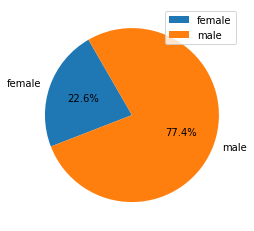

In [30]:
# Question 1a) - Global Rate of Suicide per sex for year 2009
gender_2009=data_2009_clean.groupby("sex").sum()
gender_2009_2=gender_2009[["suicides_no"]]
gender_2009_2=gender_2009_2.rename(columns={"suicides_no": " "})
gender_2009_2=gender_2009_2.plot(kind="pie",subplots=True, autopct="%1.1f%%",startangle=120)
plt.show()


In [31]:
gender_2009

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
sex,,,,,,
female,1036644,54920,1006509254,2418.08,0.0,11911452
male,1036644,188567,966793226,9757.96,0.0,11911452


The r-squared is: 0.0013388605890040572
y = 0.0x + 11.17


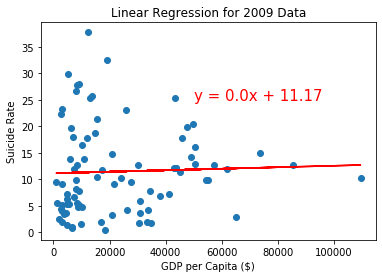

In [32]:
#Linear Regression

df_linear_2009=data_2009_clean.groupby("country").sum()
df_linear_2009=df_linear_2009.reset_index()
df_linear_2009["GDP per Capita"]=((df_linear_2009["gdp_per_capita ($)"]/12))
df_linear_2009["suicide_normalized"]=(df_linear_2009["suicides_no"]/df_linear_2009['population'])*100000

x_values = df_linear_2009['GDP per Capita']
y_values = df_linear_2009['suicide_normalized']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50000,25),fontsize=15, color="red")
plt.xlabel('GDP per Capita ($)')
plt.ylabel('Suicide Rate')
plt.title('Linear Regression for 2009 Data')
print(f"The r-squared is: {rvalue**2}")
print(line_eq)

plt.savefig('Output_Data_mg/Rate_vsGDP_regression2009.png')
plt.show()

The r-squared is: 0.0029236077953354116
y = 0.0x + 11.25


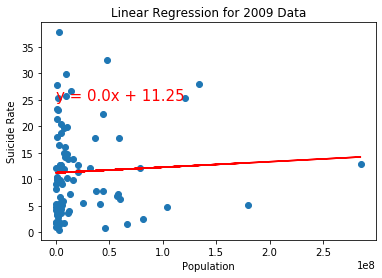

In [33]:
#Linear Regression

df_linear_2009_1=data_2009_clean.groupby("country").sum()
df_linear_2009_1=df_linear_2009.reset_index()
df_linear_2009_1["GDP per Capita"]=((df_linear_2009_1["gdp_per_capita ($)"]/12))
df_linear_2009_1["suicide_normalized"]=(df_linear_2009_1["suicides_no"]/df_linear_2009_1['population'])*100000

x_values = df_linear_2009_1['population']
y_values = df_linear_2009_1['suicide_normalized']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50000,25),fontsize=15, color="red")
plt.xlabel('Population')
plt.ylabel('Suicide Rate')
plt.title('Linear Regression for 2009 Data')
print(f"The r-squared is: {rvalue**2}")
print(line_eq)
plt.savefig('Output_Data_mg/Rate_vspopulation_regression2009.png')

plt.show()

In [34]:
# Multiple Linear Regression
# Creating a line equation with two x values and a y value

df_linear_2009=data_2009_clean.groupby("country").sum()
df_linear_2009=df_linear_2009.reset_index()
df_linear_2009["GDP per Capita"]=((df_linear_2009["gdp_per_capita ($)"]/12))
df_linear_2009["suicide_normalized"]=(df_linear_2009["suicides_no"]/df_linear_2009['population'])*100000

df_linear_2009["GDP per Capita"].values #x1
df_linear_2009['population'].values #x2
df_linear_2009["suicide_normalized"].values #y

# Defining x and y into arrays to use in the function
new_x = np.concatenate(([df_linear_2009["GDP per Capita"].values],[df_linear_2009['population'].values]))
new_y = df_linear_2009["suicide_normalized"].values

# The function below returns Multiple Linear Regression Coefficients a, b and c

def fn(x, a, b, c):
    return a + b*x[0] + c*x[1] 

popt, pcov = curve_fit(fn, new_x, new_y)
print(popt)

[1.09541571e+01 1.32890529e-05 1.01645443e-08]


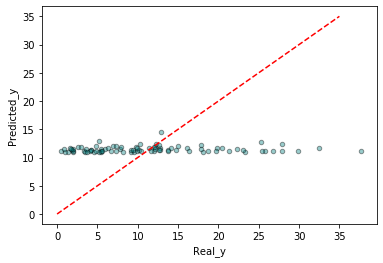

<Figure size 432x288 with 0 Axes>

In [35]:
%matplotlib inline

# This is to create a prediction from the line equation to compare the y values (sucide rate) and predicted_y values 
# to undersand if the correlation works fine or not
predicted_y = fn(new_x, 1.09541571e+01,1.32890529e-05,1.01645443e-08 )

pr_y=pd.Series(predicted_y)
n_y=pd.Series(new_y)

frame={"Real_y":n_y, "Predicted_y":pr_y}
df_plot=pd.DataFrame(frame)
df_plot.head()
scatter_plot = df_plot.plot(kind='scatter',x="Real_y", y="Predicted_y",color = 'teal',alpha=0.4, edgecolors="black",marker="o")
scatter_plot
x5=[0,35]
y5=[0,35]
plt.plot(x5,y5, linestyle="--", color="red")
plt.show()
plt.savefig('Output_Data_mg/Multi_regression.png')

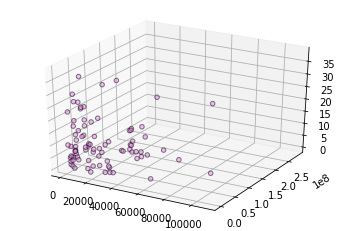

In [36]:
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(np.array(new_x[0]),np.array( new_x[1]), np.array(new_y), alpha=0.5, color="violet",edgecolors="black")
plt.show()

In [37]:
# Finding out Lat. vs Suicide Rate 

merged2009_with_lat_df=data_2009_clean.merge(latitude_data, on="country", how="inner" )
merged2009_with_lat_df.head()
merged2009_with_lat_df.to_csv('Output_Data_mg/lat_2009_suicide.csv', index=False)
data_2009_clean.to_csv('Output_Data_mg/2009_suicide.csv', index=False)

In [38]:
merged2009_with_lat_df.head()


,country,continent,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,latitude,longitude
0,Argentina,South America,2009,male,75+ years,177,653486,27.09,Argentina2009,NaN,"332,976,484,578",8961,Silent,-38.416097,-63.616672
1,Argentina,South America,2009,male,15-24 years,609,3436265,17.72,Argentina2009,NaN,"332,976,484,578",8961,Millenials,-38.416097,-63.616672
2,Argentina,South America,2009,male,55-74 years,434,2683502,16.17,Argentina2009,NaN,"332,976,484,578",8961,Silent,-38.416097,-63.616672
3,Argentina,South America,2009,male,25-34 years,504,3210244,15.70,Argentina2009,NaN,"332,976,484,578",8961,Generation X,-38.416097,-63.616672
4,Argentina,South America,2009,male,35-54 years,542,4566645,11.87,Argentina2009,NaN,"332,976,484,578",8961,Boomers,-38.416097,-63.616672


In [39]:
#Latitude Added to 2009

merged2009_with_lat_df1=merged2009_with_lat_df.groupby("country").sum()
merged2009_with_lat_df1=merged2009_with_lat_df1.reset_index()
merged2009_with_lat_df1["GDP per Capita"]=((merged2009_with_lat_df1["gdp_per_capita ($)"]/12))
merged2009_with_lat_df1["Latitude"]=((merged2009_with_lat_df1["latitude"]/12))
merged2009_with_lat_df1["suicide_normalized"]=(merged2009_with_lat_df1["suicides_no"]/merged2009_with_lat_df1['population'])*100000
merged2009_with_lat_df1.head()

,country,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($),latitude,longitude,GDP per Capita,Latitude,suicide_normalized
0,Argentina,24108,2884,37158001,107.32,0.0,107532,-460.993164,-763.400064,8961.0,-38.416097,7.761451
1,Armenia,24108,53,2689695,33.70,0.0,38580,480.829188,540.458268,3215.0,40.069099,1.970484
2,Aruba,24108,4,94795,42.23,0.0,316332,150.253320,-839.620056,26361.0,12.521110,4.219632
3,Australia,24108,2337,20529317,130.12,0.0,541536,-303.292776,1605.301632,45128.0,-25.274398,11.383720
4,Austria,24108,1278,7946894,213.22,0.0,604272,570.194772,174.600864,50356.0,47.516231,16.081755


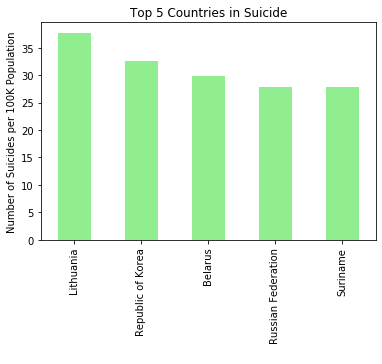

In [40]:
# Top 5 countries for suicide rate of 2009
df_3=merged2009_with_lat_df1.nlargest(5, 'suicide_normalized')

df_3.plot(kind = "bar", x="country", y="suicide_normalized", color="lightgreen", legend=False)
plt.xlabel(' ')

plt.title("Top 5 Countries in Suicide Rate")
#plt.ylabel('Suicide Rate')
plt.ylabel("Number of Suicides per 100K Population")
#plt.xlabel("Age Groups")

plt.title("Top 5 Countries in Suicide")
plt.savefig('Output_Data_mg/Top5countries2009.png')
plt.show()

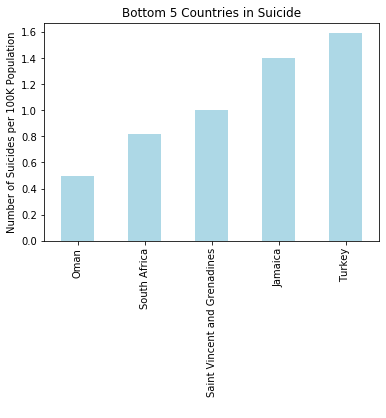

In [41]:
# Bottom 5 countries for suicide rate of 2009
merged2009_with_lat_df1.nsmallest(10, 'suicide_normalized')

# Top 5 countries for suicide rate of 2009
df_4=merged2009_with_lat_df1.nsmallest(5, 'suicide_normalized')

df_4.plot(kind = "bar", x="country", y="suicide_normalized", color="lightblue", legend=False)
plt.xlabel(' ')
#plt.ylabel('Suicide Rate')
plt.ylabel("Number of Suicides per 100K Population")
#plt.xlabel("Age Groups")
plt.title("Bottom 5 Countries in Suicide")
plt.savefig('Output_Data_mg/Bottom5countries2009.png')
plt.show()

In [42]:
# Correlation Matrix
merged2009_with_lat_df2=merged2009_with_lat_df1.drop(columns=['year','suicides/100k pop', 'HDI for year','latitude', 'longitude',
                                                             "gdp_per_capita ($)"])
corr = merged2009_with_lat_df2.corr(method="pearson")
corr.style.background_gradient(cmap='coolwarm')

# # Correlation Matrix
# df_bar2=df_bar.drop(columns=['suicides/100k pop', 'HDI for year','count'])
# df_bar2["GDP per Capita"]=df_bar2["gdp_per_capita ($)"]/12
# # corr = df_bar2.corr()
# # corr.style.background_gradient(cmap='coolwarm')
# # plt.savefig('Output_Data_mg/CorrelationMatrix.png')
# # plt.show()
# df_bar2=df_bar2.drop(columns=["gdp_per_capita ($)"])
# corr = df_bar2.corr()
# corr.style.background_gradient(cmap='coolwarm')
# # plt.savefig('Output_Data_mg/CorrelationMatrix.png')
# # plt.show()


,suicides_no,population,GDP per Capita,Latitude,suicide_normalized
suicides_no,1.000000,0.824750,0.085164,0.170824,0.344315
population,0.824750,1.000000,0.039592,0.023738,0.054070
GDP per Capita,0.085164,0.039592,1.000000,0.353706,0.036590
Latitude,0.170824,0.023738,0.353706,1.000000,0.366834
suicide_normalized,0.344315,0.054070,0.036590,0.366834,1.000000


In [43]:
merged2009_with_lat_df2["normalized"]=(merged2009_with_lat_df2["suicides_no"]/merged2009_with_lat_df2['population'])*100000
corr = merged2009_with_lat_df2.corr(method="pearson")
corr.style.background_gradient(cmap='coolwarm')

,suicides_no,population,GDP per Capita,Latitude,suicide_normalized,normalized
suicides_no,1.000000,0.824750,0.085164,0.170824,0.344315,0.344315
population,0.824750,1.000000,0.039592,0.023738,0.054070,0.054070
GDP per Capita,0.085164,0.039592,1.000000,0.353706,0.036590,0.036590
Latitude,0.170824,0.023738,0.353706,1.000000,0.366834,0.366834
suicide_normalized,0.344315,0.054070,0.036590,0.366834,1.000000,1.000000
normalized,0.344315,0.054070,0.036590,0.366834,1.000000,1.000000


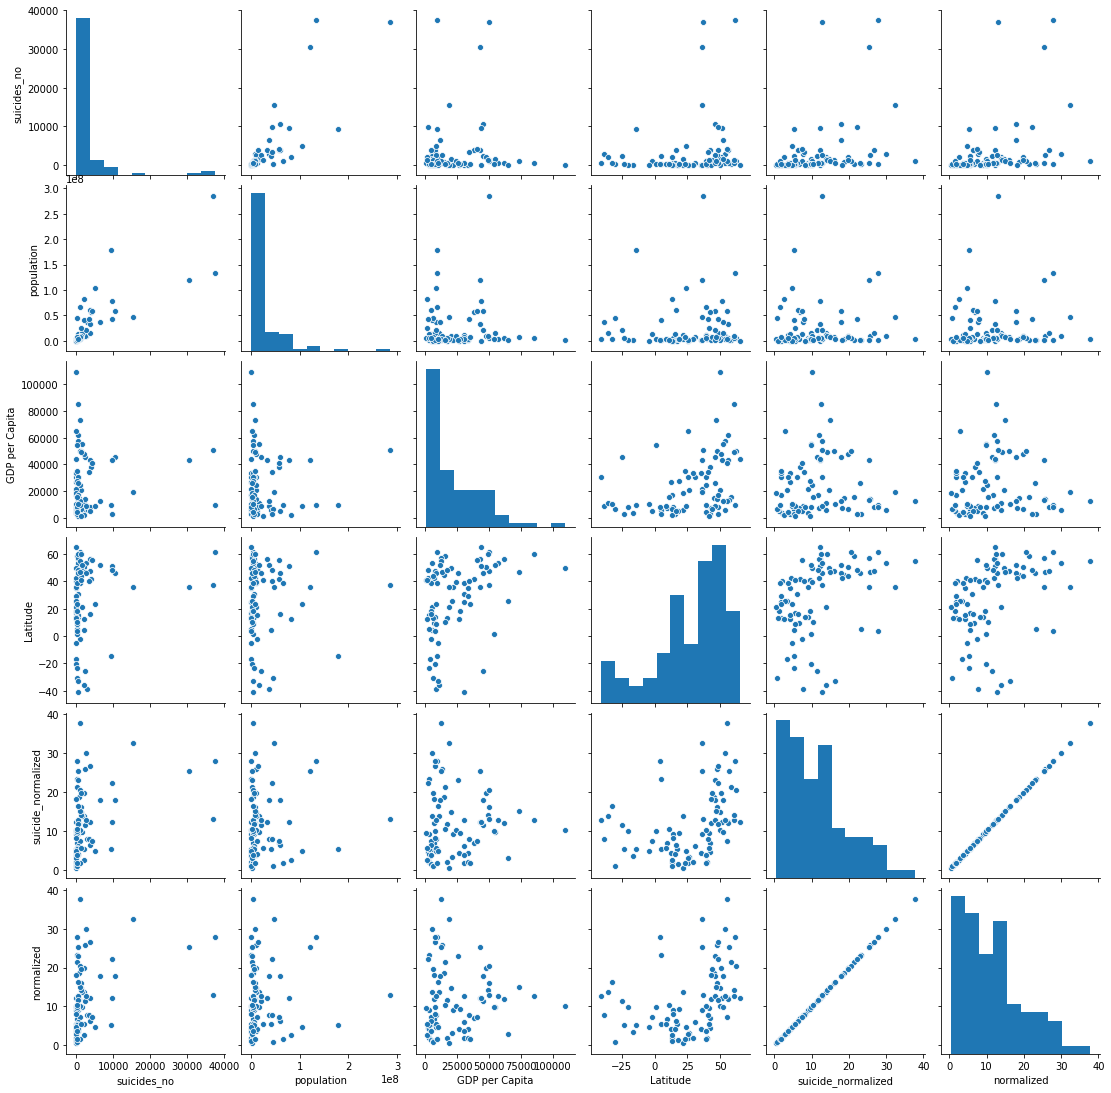

In [44]:
# Basic correlogram
sns.pairplot(merged2009_with_lat_df2)


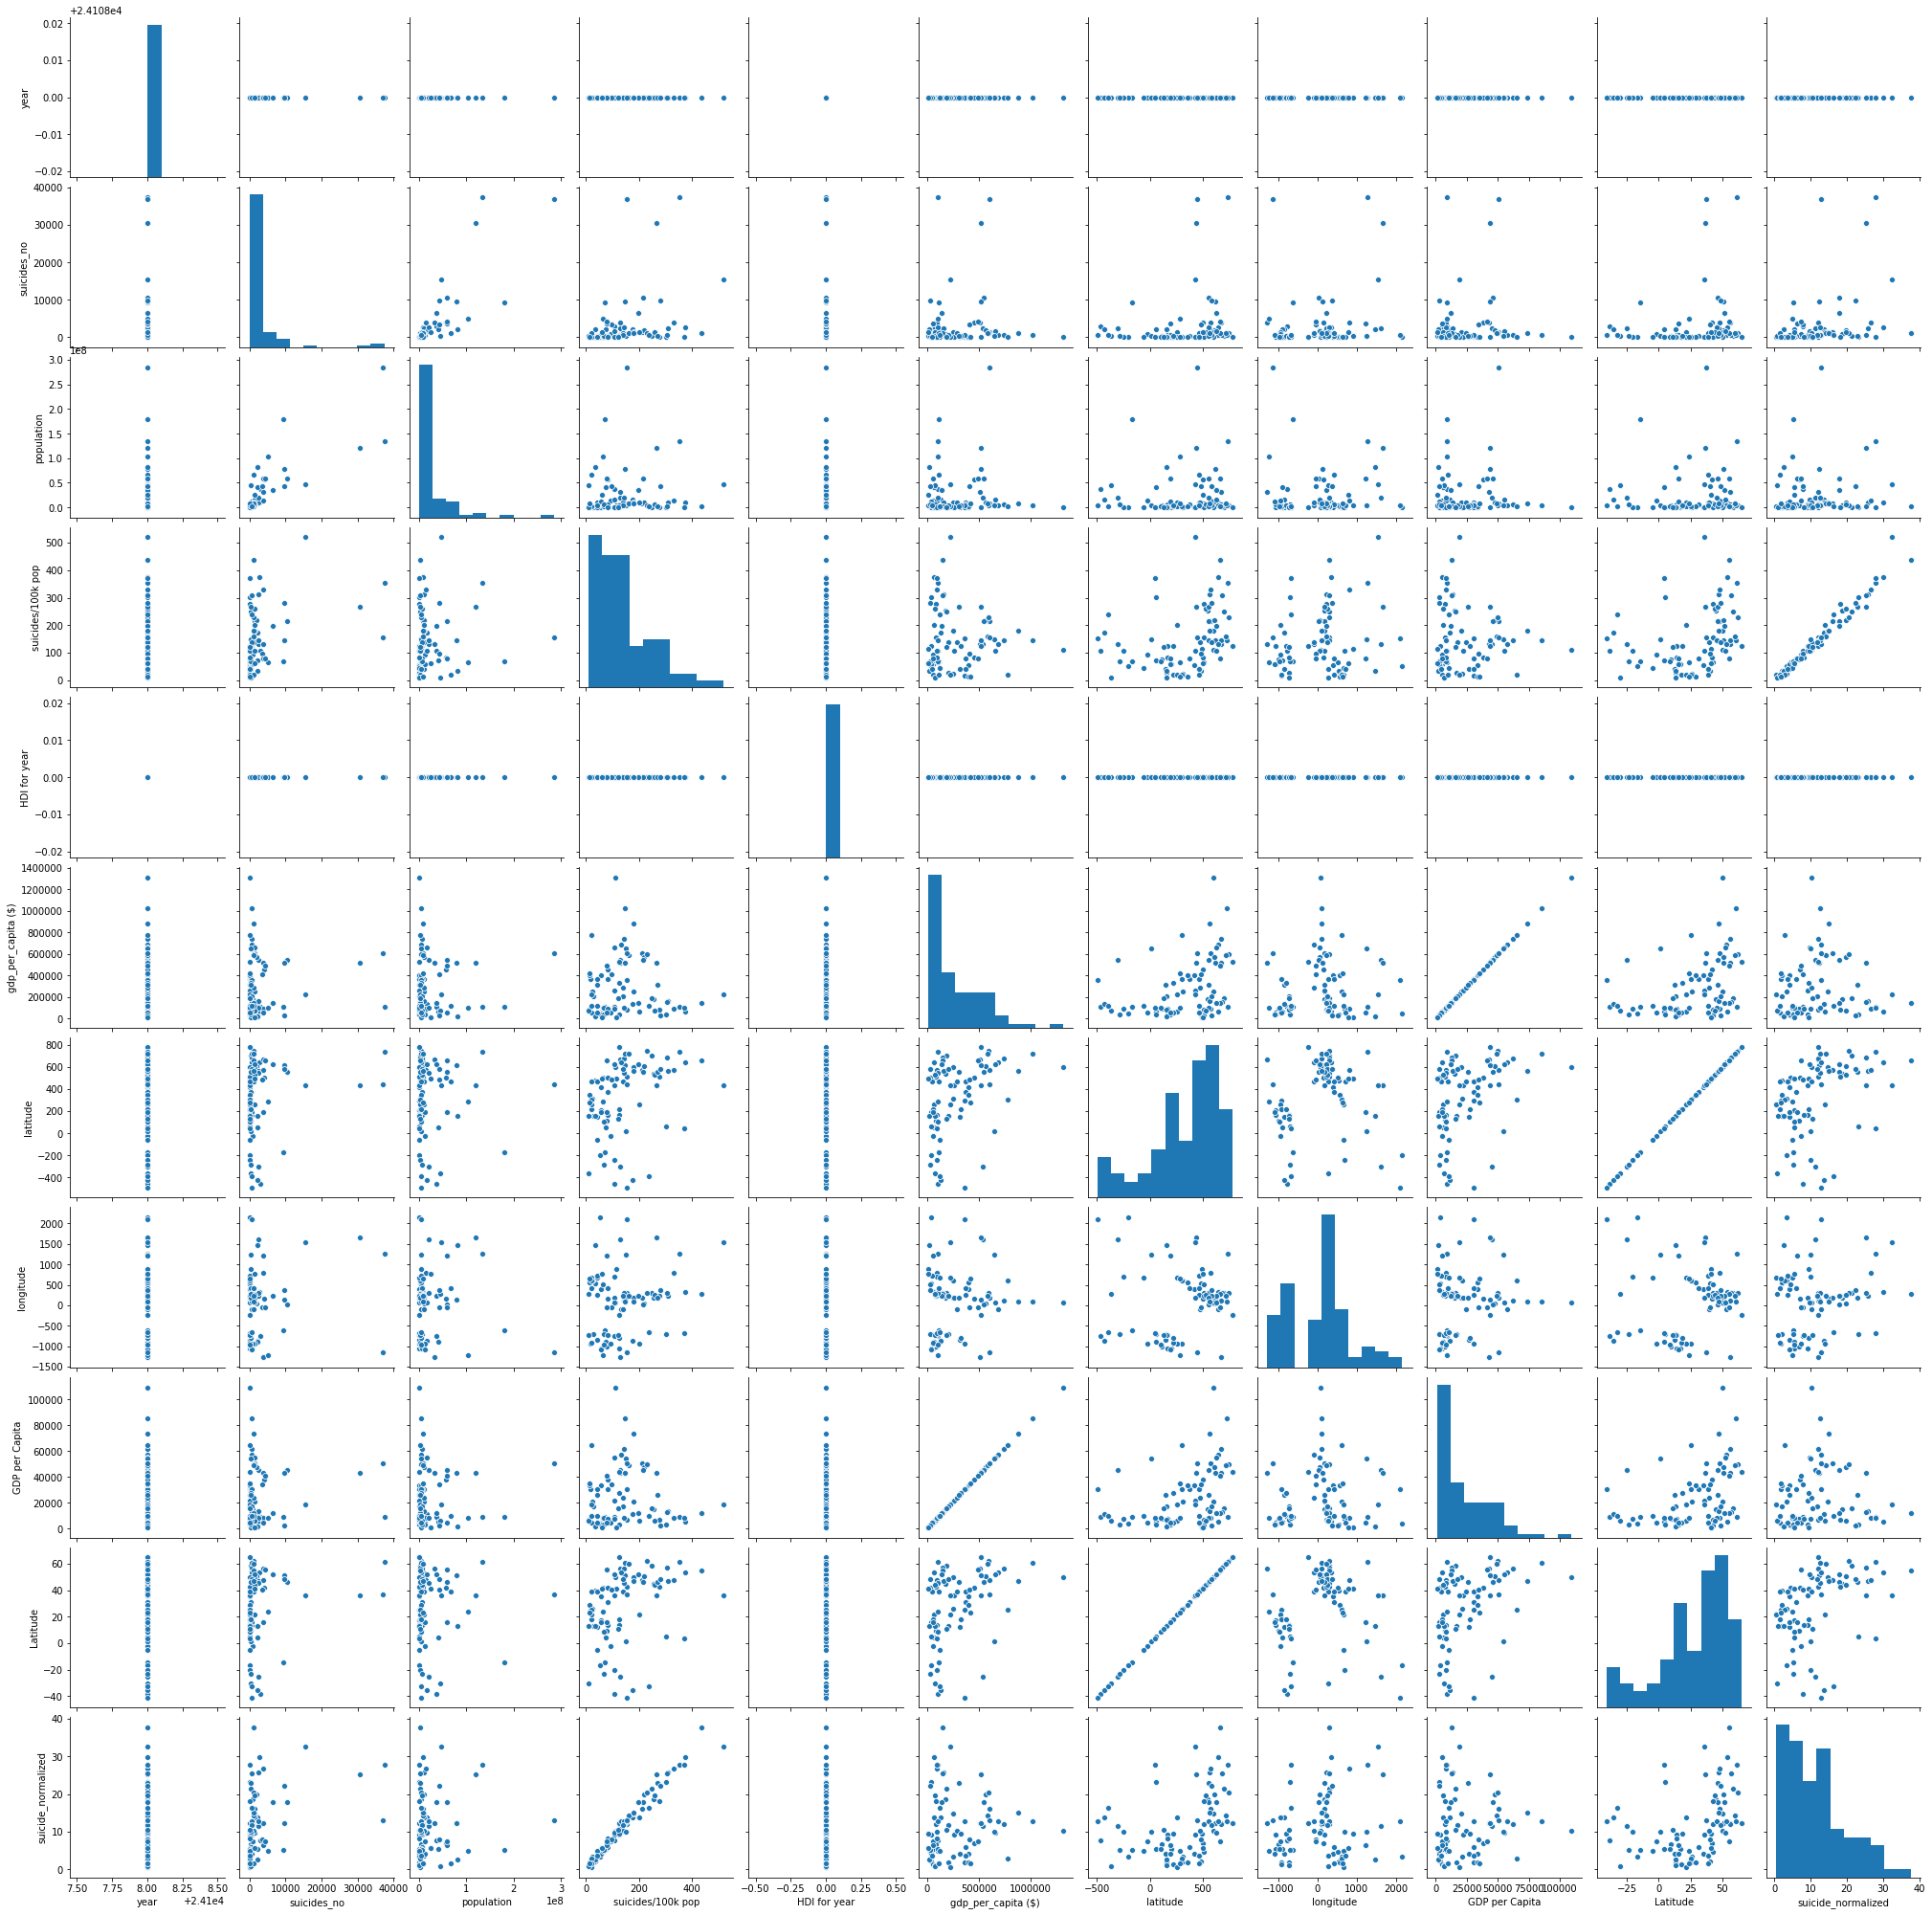

In [45]:
 
# Basic correlogram
sns.pairplot(merged2009_with_lat_df1)



The r-squared is: 0.1345670337341077
y = 0.11x + 8.29
0.36683379579055647


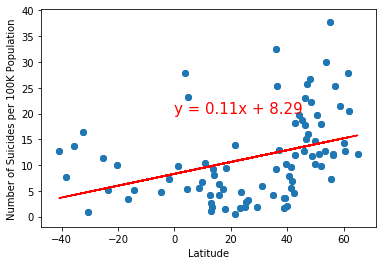

In [46]:
x2=merged2009_with_lat_df1["Latitude"]
y2=merged2009_with_lat_df1["suicide_normalized"]


plt.scatter(x2,y2)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x2, y2)
regress_values = x2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x2,y2,c='#1f77b4')
plt.plot(x2,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel("Number of Suicides per 100K Population")

print(f"The r-squared is: {rvalue**2}")
print(line_eq)
print(rvalue)
plt.savefig('Output_Data_mg/Latitude_rate_year2009.png')
plt.show()


The r-squared is: 0.21902136994973218
y = 0.23x + 3.65


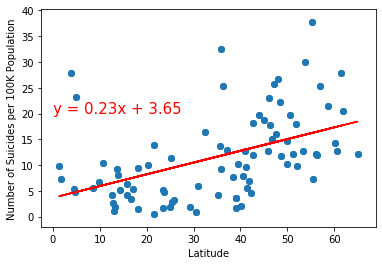

In [47]:
x2=abs(merged2009_with_lat_df1["Latitude"])
y2=merged2009_with_lat_df1["suicide_normalized"]


plt.scatter(x2,y2)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x2, y2)
regress_values = x2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x2,y2,c='#1f77b4')
plt.plot(x2,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel("Number of Suicides per 100K Population")

print(f"The r-squared is: {rvalue**2}")
print(line_eq)
plt.savefig('Output_Data_mg/Latitude_rate_year2009.png')
plt.show()


The r-squared is: 0.2007332595779445
y = 0.23x + 3.82


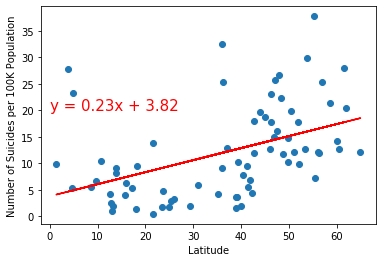

In [48]:
# Create Northern and Southern Hemisphere DataFrames
northern_hem_df = merged2009_with_lat_df1.loc[(merged2009_with_lat_df1["Latitude"]>=0)]
southern_hem_df = merged2009_with_lat_df1.loc[(merged2009_with_lat_df1["Latitude"]<0)]

x_values = northern_hem_df['Latitude']
y_values = northern_hem_df["suicide_normalized"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel("Number of Suicides per 100K Population")

print(f"The r-squared is: {rvalue**2}")
print(line_eq)
plt.savefig('Output_Data_mg/NorthernLatitude_rate_year2009.png')

plt.show()

The r-squared is: 0.22045248487712926
y = -0.17x + 4.13


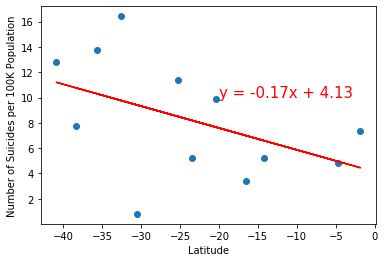

In [49]:
# Create Northern and Southern Hemisphere DataFrames
x_values = southern_hem_df['Latitude']
y_values = southern_hem_df["suicide_normalized"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel("Number of Suicides per 100K Population")

print(f"The r-squared is: {rvalue**2}")
print(line_eq)

plt.savefig('Output_Data_mg/SouthernLatitude_rate_year2009.png')
plt.show()

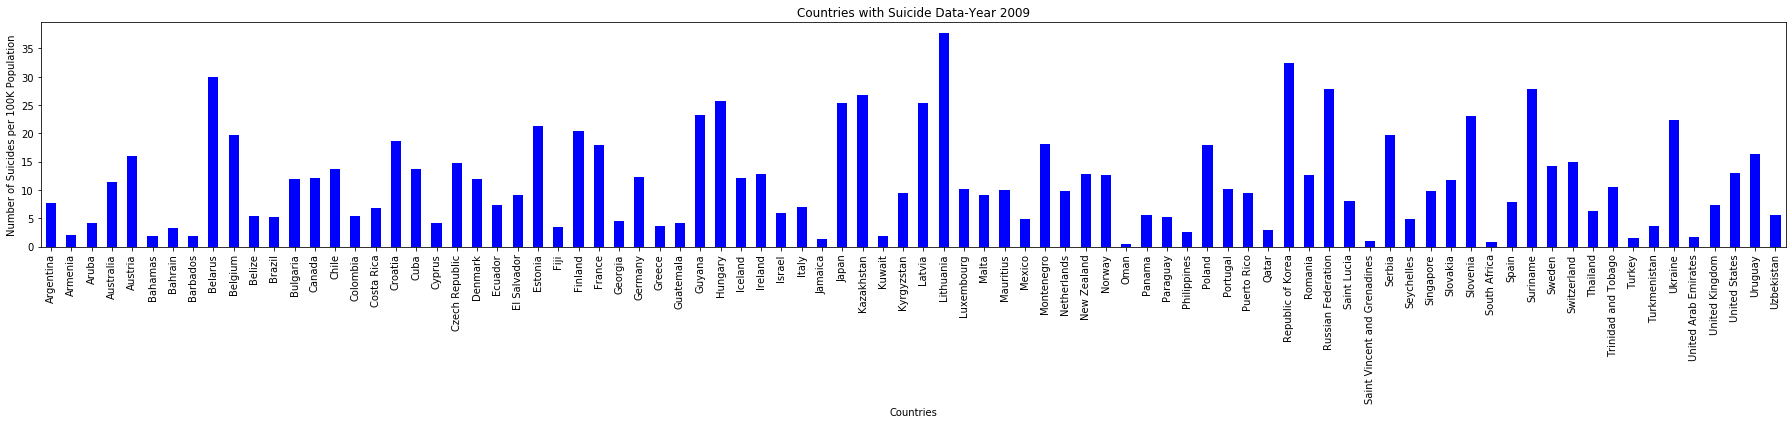

In [50]:
# 2009
y=merged2009_with_lat_df1["suicide_normalized"]
x=merged2009_with_lat_df1["country"]
merged2009_with_lat_df1.head()
merged2009_with_lat_df1.plot(kind="bar",x="country", y="suicide_normalized",rot=90, color="blue", legend=False, figsize=(25,6))
plt.ylabel("Number of Suicides per 100K Population")
plt.xlabel("Countries")
plt.title("Countries with Suicide Data-Year 2009")
plt.tight_layout()
plt.savefig('Output_Data_mg/Countries_Year_2009.png')

plt.show()


In [51]:
age_15yrs

year  suicides_no  population  suicides/100k pop  \
age         sex                                                           
15-24 years female  1746090        76068  1839418854            3814.76   
            male    1746090       285430  1909487573           12505.57   
25-34 years female  1746090        92856  1849477289            4134.17   
            male    1746090       402292  1876620283           18035.05   
35-54 years female  1746090       241138  3447401967            5629.04   
            male    1746090       928468  3370979540           22669.24   
5-14 years  female  1746090         8188  1717341048             434.44   
            male    1746090        15255  1794949462             726.26   
55-74 years female  1746090       191295  2284648643            6595.76   
            male    1746090       593662  1985393418           23847.54   
75+ years   female  1746090       102946   884558527            8908.39   
            male    1746090       215529   510676122           36030.46   

                    HDI for year  gdp_per_capita ($)   count  
age         sex                                               
15-24 years female       308.009            20557282  156600  
            male         308.009            20557282  156600  
25-34 years female       308.009            20557282  156600  
            male         308.009            20557282  156600  
35-54 years female       308.009            20557282  156600  
            male         308.009            20557282  156600  
5-14 years  female       308.009            20557282  156600  
            male         308.009            20557282  156600  
55-74 years female       308.009            20557282  156600  
            male         308.009            20557282  156600  
75+ years   female       308.009            20557282  156600  
            male         308.009            20557282  156600

In [53]:
# Multiple Linear Regression
# Creating a line equation with two x values and a y value
merged2009_with_lat_df1

multiple2=merged2009_with_lat_df1.groupby("country").sum()
multiple2=multiple2.reset_index()
multiple2["GDP per Capita"]=((multiple2["gdp_per_capita ($)"]/12))
multiple2["suicide_normalized"]=(multiple2["suicides_no"]/multiple2['population'])*100000

multiple2["GDP per Capita"].values #x1
multiple2['population'].values #x2
multiple2["suicide_normalized"].values #y

# Defining x and y into arrays to use in the function
new_x = np.concatenate(([multiple2["GDP per Capita"].values],[multiple2['Latitude'].values]))
new_y = multiple2["suicide_normalized"].values

# The function below returns Multiple Linear Regression Coefficients a, b and c

def fn(x, a, b, c):
    return a + b*x[0] + c*x[1] 

popt, pcov = curve_fit(fn, new_x, new_y)
print(popt)

[ 8.91180418e+00 -4.10115754e-05  1.26787325e-01]


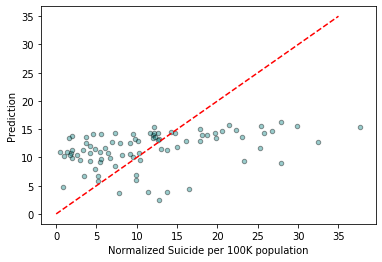

<Figure size 432x288 with 0 Axes>

In [54]:
%matplotlib inline

# This is to create a prediction from the line equation to compare the y values (sucide rate) and predicted_y values 
# to undersand if the correlation works fine or not
predicted_y = fn(new_x, 8.91180418e+00,-4.10115754e-05,1.26787325e-01 )

pr_y=pd.Series(predicted_y)
n_y=pd.Series(new_y)

frame={"Normalized Suicide per 100K population":n_y, "Prediction":pr_y}
df_plot=pd.DataFrame(frame)
df_plot.head()
scatter_plot = df_plot.plot(kind='scatter',x="Normalized Suicide per 100K population", y="Prediction",color = 'teal',alpha=0.4, edgecolors="black",marker="o")
scatter_plot
x5=[0,35]
y5=[0,35]
plt.plot(x5,y5, linestyle="--", color="red")
plt.show()
plt.savefig('Output_Data_mg/Multi_regression.png')

In [55]:
# Multiple Linear Regression
# Creating a line equation with two x values and a y value
merged2009_with_lat_df1

multiple2=merged2009_with_lat_df1.groupby("country").sum()
multiple2=multiple2.reset_index()
multiple2["GDP per Capita"]=((multiple2["gdp_per_capita ($)"]/12))
multiple2["suicide_normalized"]=(multiple2["suicides_no"]/multiple2['population'])*100000

multiple2["GDP per Capita"].values #x1
multiple2['population'].values #x2
multiple2["suicide_normalized"].values #y

# Defining x and y into arrays to use in the function
new_x = np.concatenate(([multiple2["population"].values],[multiple2['Latitude'].values]))
new_y = multiple2["suicide_normalized"].values

# The function below returns Multiple Linear Regression Coefficients a, b and c

def fn(x, a, b, c):
    return a + b*x[0] + c*x[1] 

popt, pcov = curve_fit(fn, new_x, new_y)
print(popt)

[8.10222974e+00 8.75354232e-09 1.14644195e-01]


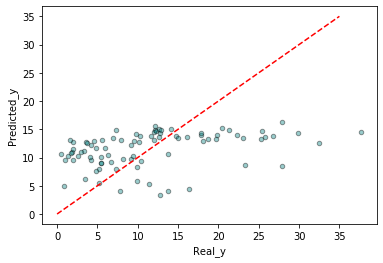

<Figure size 432x288 with 0 Axes>

In [56]:
%matplotlib inline

# This is to create a prediction from the line equation to compare the y values (sucide rate) and predicted_y values 
# to undersand if the correlation works fine or not
predicted_y = fn(new_x, 8.10222974e+00,8.75354232e-09,1.14644195e-01 )

pr_y=pd.Series(predicted_y)
n_y=pd.Series(new_y)

frame={"Real_y":n_y, "Predicted_y":pr_y}
df_plot=pd.DataFrame(frame)
df_plot.head()
scatter_plot = df_plot.plot(kind='scatter',x="Real_y", y="Predicted_y",color = 'teal',alpha=0.4, edgecolors="black",marker="o")
scatter_plot
x5=[0,35]
y5=[0,35]
plt.plot(x5,y5, linestyle="--", color="red")
plt.show()
plt.savefig('Output_Data_mg/Multi_regression.png')